# Distribution of diseases in the world 🩺

In this notebook we will study the propagation of diseases in the world in 2024

Dataset source: [Global health statistics](https://www.kaggle.com/datasets/malaiarasugraj/global-health-statistics/data)

<!-- Quelles sont les maladies les plus courantes dans chaque région du monde?
Existe-t-il des différences significatives dans la prévalence de la maladie entre les pays développés et en développement? -->

## Study goal:

- What are the most common diseases in each region of the world?
- Are there significant differences in the prevalence of disease between developed and developing countries?

In [261]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
import plotly.io as pio
warnings.filterwarnings('ignore')
pio.renderers.default = 'vscode'
import seaborn as sns
import matplotlib.pyplot as plt

px.defaults.template = "plotly_dark"

Columns in the dataset:
- **Country:** The name of the country where the health data was recorded.
- **Year:** The year in which the data was collected.
- **Disease Name:** The name of the disease or health condition tracked.
- **Disease Category:** The category of the disease (e.g., Infectious, Non-Communicable).
- **Prevalence Rate (%):** The percentage of the population affected by the disease.
- **Incidence Rate (%):** The percentage of new or newly diagnosed cases.
- **Mortality Rate (%):** The percentage of the affected population that dies from the disease.
- **Age Group:** The age range most affected by the disease.
- **Gender:** The gender(s) affected by the disease (Male, Female, Both).
- **Population Affected:** The total number of individuals affected by the disease.
- **Healthcare Access (%):** The percentage of the population with access to healthcare.
- **Doctors per 1000:** The number of doctors per 1000 people.
- **Hospital Beds per 1000:** The number of hospital beds available per 1000 people.
- **Treatment Type:** The primary treatment method for the disease (e.g., Medication, Surgery).
- **Average Treatment Cost (USD):** The average cost of treating the disease in USD.
- **Availability of Vaccines/Treatment:** Whether vaccines or treatments are available.
- **Recovery Rate (%):** The percentage of people who recover from the disease.
- **DALYs:** Disability-Adjusted Life Years, a measure of disease burden.
- **Improvement in 5 Years (%):** The improvement in disease outcomes over the last five years.
- **Per Capita Income (USD):** The average income per person in the country.
- **Education Index:** The average level of education in the country.
- **Urbanization Rate (%):** The percentage of the population living in urban areas

In [262]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("malaiarasugraj/global-health-statistics")

# print("Path to dataset files:", path)

In [263]:
df = pd.read_csv("data/Global Health Statistics.csv")
df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Saudi Arabia,2021,Parkinson's Disease,Infectious,4.56,4.83,9.65,0-18,Female,119332,...,4.23,Vaccination,4528,Yes,92.11,1024,3.88,29335,0.75,27.94
999996,Saudi Arabia,2013,Malaria,Respiratory,0.26,1.76,0.56,0-18,Female,354927,...,6.34,Surgery,20686,No,84.47,202,7.95,30752,0.47,77.66
999997,USA,2016,Zika,Respiratory,13.44,14.13,1.91,19-35,Other,807915,...,8.11,Therapy,18807,No,86.81,3338,7.31,62897,0.72,46.90
999998,Nigeria,2020,Asthma,Chronic,1.96,14.56,4.98,61+,Female,385896,...,6.91,Medication,21033,Yes,62.15,4806,3.82,98189,0.51,34.73


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [265]:
df.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


In [266]:
df.isna().sum()

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64

In [267]:
df_24 = df[df["Year"] == 2024]

In [268]:
df_24

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
15,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,9.72,Medication,4664,No,87.75,484,8.11,56179,0.63,29.00
54,Argentina,2024,Cancer,Parasitic,10.94,12.88,6.25,61+,Female,419192,...,5.36,Medication,16363,Yes,72.52,1274,5.36,9633,0.51,37.11
69,Australia,2024,Measles,Genetic,5.88,12.37,4.73,36-60,Other,767034,...,6.73,Surgery,33829,No,75.40,2921,7.85,50348,0.87,56.51
79,Brazil,2024,Diabetes,Genetic,0.73,9.28,1.09,19-35,Male,4233,...,3.10,Therapy,2078,No,61.80,386,3.23,73287,0.74,25.44
109,Saudi Arabia,2024,Malaria,Chronic,13.40,11.44,9.59,61+,Other,259325,...,5.84,Surgery,14273,Yes,90.56,4937,7.20,78046,0.64,70.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,USA,2024,COVID-19,Infectious,10.56,8.92,3.10,61+,Other,509069,...,8.08,Therapy,25536,No,72.12,1448,5.01,69574,0.55,84.37
999969,Japan,2024,Diabetes,Neurological,15.19,2.93,7.38,19-35,Male,481945,...,6.31,Medication,11078,Yes,94.54,3645,2.29,24648,0.64,89.87
999971,Saudi Arabia,2024,Influenza,Genetic,3.67,1.80,0.79,19-35,Other,85928,...,7.15,Surgery,32179,No,51.51,3847,9.96,64922,0.65,46.94
999987,Mexico,2024,Hypertension,Respiratory,0.50,10.19,8.58,61+,Other,38627,...,3.28,Therapy,44642,No,70.08,834,2.57,87011,0.88,53.96


In [269]:
df_24['Country'].unique()

array(['USA', 'Argentina', 'Australia', 'Brazil', 'Saudi Arabia',
       'South Korea', 'Mexico', 'China', 'Japan', 'Turkey', 'France',
       'India', 'Nigeria', 'UK', 'Germany', 'Indonesia', 'Russia',
       'South Africa', 'Canada', 'Italy'], dtype=object)

In [270]:
df_24['Age Group'].unique()

array(['36-60', '61+', '19-35', '0-18'], dtype=object)

In [271]:
df_24['Age Group labels'] = df_24['Age Group'].replace(
{'0-18':'children and teens',
 '19-35':'young adults',
 '36-60':'adults',
 '61+':'seniors'})

df_24.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group labels
15,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,Medication,4664,No,87.75,484,8.11,56179,0.63,29.00,adults
54,Argentina,2024,Cancer,Parasitic,10.94,12.88,6.25,61+,Female,419192,...,Medication,16363,Yes,72.52,1274,5.36,9633,0.51,37.11,seniors
69,Australia,2024,Measles,Genetic,5.88,12.37,4.73,36-60,Other,767034,...,Surgery,33829,No,75.40,2921,7.85,50348,0.87,56.51,adults
79,Brazil,2024,Diabetes,Genetic,0.73,9.28,1.09,19-35,Male,4233,...,Therapy,2078,No,61.80,386,3.23,73287,0.74,25.44,young adults
109,Saudi Arabia,2024,Malaria,Chronic,13.40,11.44,9.59,61+,Other,259325,...,Surgery,14273,Yes,90.56,4937,7.20,78046,0.64,70.02,seniors


In [272]:
df_24['Disease Name'].unique()

array(['Dengue', 'Cancer', 'Measles', 'Diabetes', 'Malaria',
       "Parkinson's Disease", 'Rabies', 'Hypertension', 'Zika', 'Leprosy',
       'Tuberculosis', 'Influenza', 'HIV/AIDS', 'Polio', 'Hepatitis',
       'COVID-19', "Alzheimer's Disease", 'Ebola', 'Cholera', 'Asthma'],
      dtype=object)

There is unconsistancy in diseases's category, let's fix it:

In [273]:
disease_categories = {
    'Viral': [
        'Dengue', 'Measles', 'Rabies', 'Zika', 'Influenza', 'HIV/AIDS', 'Polio',
        'Hepatitis', 'COVID-19', 'Ebola'
    ],
    'Genetic': [
        'Cancer'
    ],
    'Metabolic': [
        'Diabetes'
    ],
    'Parasitic': [
        'Malaria'
    ],
    'Neurological': [
        'Parkinson\'s Disease', 'Alzheimer\'s Disease'
    ],
    'Cardiovascular': [
        'Hypertension'
    ],
    'Bacterial': [
        'Leprosy', 'Tuberculosis', 'Cholera'
    ],
    'Respiratory': [
        'Asthma'
    ]
}

for category, diseases in disease_categories.items():
        df_24.loc[df_24['Disease Name'].isin(diseases), 'Disease Category'] = category


<Axes: >

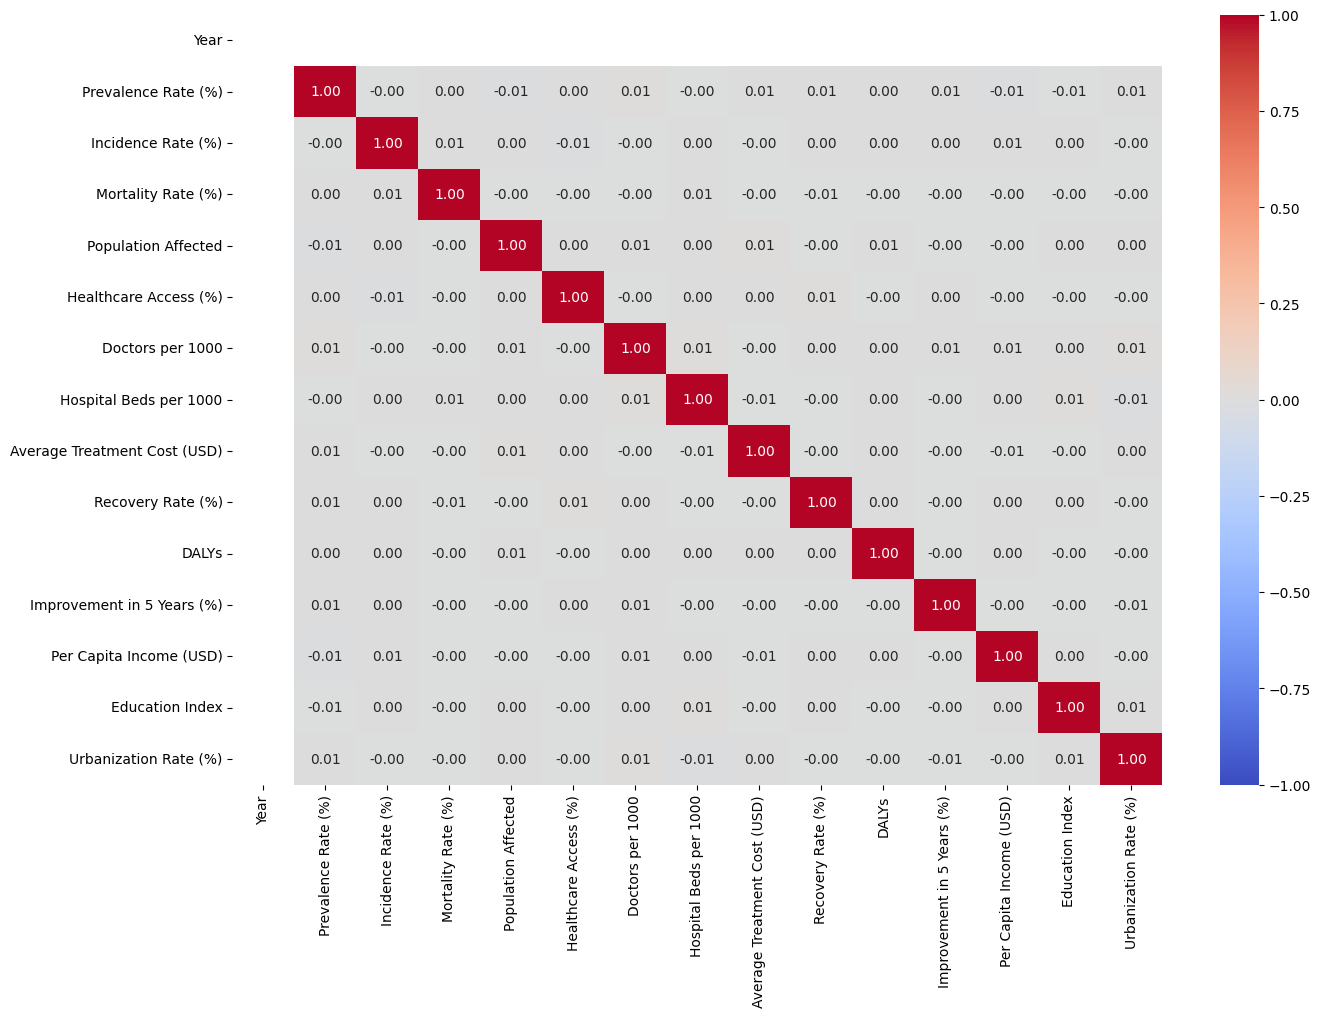

In [305]:
num_col = df_24.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))

corr = df_24[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1 )

In [274]:
df_24

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group labels
15,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,Medication,4664,No,87.75,484,8.11,56179,0.63,29.00,adults
54,Argentina,2024,Cancer,Genetic,10.94,12.88,6.25,61+,Female,419192,...,Medication,16363,Yes,72.52,1274,5.36,9633,0.51,37.11,seniors
69,Australia,2024,Measles,Viral,5.88,12.37,4.73,36-60,Other,767034,...,Surgery,33829,No,75.40,2921,7.85,50348,0.87,56.51,adults
79,Brazil,2024,Diabetes,Metabolic,0.73,9.28,1.09,19-35,Male,4233,...,Therapy,2078,No,61.80,386,3.23,73287,0.74,25.44,young adults
109,Saudi Arabia,2024,Malaria,Parasitic,13.40,11.44,9.59,61+,Other,259325,...,Surgery,14273,Yes,90.56,4937,7.20,78046,0.64,70.02,seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,USA,2024,COVID-19,Viral,10.56,8.92,3.10,61+,Other,509069,...,Therapy,25536,No,72.12,1448,5.01,69574,0.55,84.37,seniors
999969,Japan,2024,Diabetes,Metabolic,15.19,2.93,7.38,19-35,Male,481945,...,Medication,11078,Yes,94.54,3645,2.29,24648,0.64,89.87,young adults
999971,Saudi Arabia,2024,Influenza,Viral,3.67,1.80,0.79,19-35,Other,85928,...,Surgery,32179,No,51.51,3847,9.96,64922,0.65,46.94,young adults
999987,Mexico,2024,Hypertension,Cardiovascular,0.50,10.19,8.58,61+,Other,38627,...,Therapy,44642,No,70.08,834,2.57,87011,0.88,53.96,seniors


Let's check the distribution of disease in each country

In [275]:
COLOR_PRIMARY = '#6e7b91'

COLOR_HIGHLIGHT = '#c2253e'
COLOR_PALETTE = ['#6e7b91', '#c2253e', '#f7f7f7']

In [276]:
df_counts = df_24.groupby(['Country', 'Disease Name']).size().reset_index(name='Count')

countries = df_counts['Country'].unique()

fig = go.Figure()

for country in countries:
    df_country = df_counts[df_counts['Country'] == country]
    max_count = df_country['Count'].max()
    colors = [COLOR_HIGHLIGHT if count == max_count else COLOR_PRIMARY for count in df_country['Count']]
    fig.add_trace(
        go.Bar(
            x=df_country['Disease Name'],
            y=df_country['Count'],
            name=country,
            marker=dict(color=colors)
        )
    )

dropdown_buttons = [
]
for i, country in enumerate(countries):
    visibility = [i == j for j in range(len(countries))]
    dropdown_buttons.append(
        {'label': country, 'method': 'update', 'args': [{'visible': visibility}, {'title': f'Distribution of Diseases in {country}'}]}
    )

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
        )
    ],
    barmode='group',
    title='Distribution of Diseases by Country',
    xaxis_title='Disease Name',
    yaxis_title='Count'
)

fig.show()


Let's check the distribution of type of diseases in each country:

In [277]:

df_counts = df_24.groupby(['Country', 'Disease Category']).size().reset_index(name='Count')

countries = df_counts['Country'].unique()

fig = go.Figure()

for country in countries:
    df_country = df_counts[df_counts['Country'] == country]
    max_count = df_country['Count'].max()
    colors = [COLOR_HIGHLIGHT if count == max_count else COLOR_PRIMARY  for count in df_country['Count']]
    fig.add_trace(
        go.Bar(
            x=df_country['Disease Category'],
            y=df_country['Count'],
            name=country,
            marker=dict(color=colors)
        )
    )

dropdown_buttons = [
]
for i, country in enumerate(countries):
    visibility = [i == j for j in range(len(countries))]
    dropdown_buttons.append(
        {'label': country, 'method': 'update', 'args': [{'visible': visibility}, {'title': f'Distribution of Diseases in {country}'}]}
    )

fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
        )
    ],
    barmode='group',
    title='Distribution of Diseases by Country',
    xaxis_title='Disease Category',
    yaxis_title='Count'
)

fig.show()


We notice that some diesease are more frequante in some countries than the others.

For example in Brazil, Germany and Indonisia has Cancer as one of the top 3 diseases in the coutry but it's not the case for the other countries

## Let's check the distribution of diseases between world countries' categories

In [278]:
# let's add a column that labelise coutnries (first world coutries, second world countries, third world countries)


def labelise_country(c):
    """labelise coutries into first, second and thrid countries"""
    first_wc= ["USA","Australia","South Korea","Japan","France","UK","Germany","Canada","Italy"]
    second_wc = ["Russia","China","Saudi Arabia","Turkey"]
    third_wc = ["Argentina","Brazil","Mexico","India","Nigeria","Indonesia","South Africa"]

    if c in first_wc:
        return "First World country"
    elif c in second_wc:
        return "Second World country"
    elif c in third_wc:
        return "Third World country"

df_24["Country label"] = df_24["Country"].apply(labelise_country)
df_24

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Age Group labels,Country label
15,USA,2024,Dengue,Viral,1.82,2.98,7.01,36-60,Female,623844,...,4664,No,87.75,484,8.11,56179,0.63,29.00,adults,First World country
54,Argentina,2024,Cancer,Genetic,10.94,12.88,6.25,61+,Female,419192,...,16363,Yes,72.52,1274,5.36,9633,0.51,37.11,seniors,Third World country
69,Australia,2024,Measles,Viral,5.88,12.37,4.73,36-60,Other,767034,...,33829,No,75.40,2921,7.85,50348,0.87,56.51,adults,First World country
79,Brazil,2024,Diabetes,Metabolic,0.73,9.28,1.09,19-35,Male,4233,...,2078,No,61.80,386,3.23,73287,0.74,25.44,young adults,Third World country
109,Saudi Arabia,2024,Malaria,Parasitic,13.40,11.44,9.59,61+,Other,259325,...,14273,Yes,90.56,4937,7.20,78046,0.64,70.02,seniors,Second World country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999968,USA,2024,COVID-19,Viral,10.56,8.92,3.10,61+,Other,509069,...,25536,No,72.12,1448,5.01,69574,0.55,84.37,seniors,First World country
999969,Japan,2024,Diabetes,Metabolic,15.19,2.93,7.38,19-35,Male,481945,...,11078,Yes,94.54,3645,2.29,24648,0.64,89.87,young adults,First World country
999971,Saudi Arabia,2024,Influenza,Viral,3.67,1.80,0.79,19-35,Other,85928,...,32179,No,51.51,3847,9.96,64922,0.65,46.94,young adults,Second World country
999987,Mexico,2024,Hypertension,Cardiovascular,0.50,10.19,8.58,61+,Other,38627,...,44642,No,70.08,834,2.57,87011,0.88,53.96,seniors,Third World country


In [279]:
print("First world country: ", df_24['Country label'].value_counts().get("First World country"))
print("Second world country: ", df_24['Country label'].value_counts().get("Second World country"))
print("Third world country: ", df_24['Country label'].value_counts().get("Third World country"))

First world country:  18012
Second world country:  8085
Third world country:  13906


In [ ]:
fig = px.pie(df_24, names='Country label', title='Distribution of Countries by World Category')

fig.update_layout(piecolorway=COLOR_PALETTE,)

fig.show()



From this distribution, it appears that the dataset is not balanced in terms of representation across world categories. This imbalance might be due to several factors:

- First world countries benefit from better disease tracking systems and more extensive health studies, resulting in a higher volume of recorded data.
- Second world countries could be underrepresented as they may lack the extensive infrastructure for tracking diseases seen in first world countries, while not receiving the same level of global attention as third world countries.
- Third world countries might be more represented due to global research efforts focused on tropical and infectious diseases that disproportionately affect these regions.

This imbalance highlights the importance of considering biases in data collection when interpreting global health statistics.


## Top 3 diseases in each country

In [ ]:
df_counts = df_24.groupby(['Country', 'Disease Name','Disease Category' ,'Country label']).size().reset_index(name='Count')

def get_top_3_diseases(df, colname):
    top_3_diseases = []
    countries = df[colname].unique()

    for country in countries:
        df_country = df[df[colname] == country]
        top_3 = df_country.sort_values(by='Count', ascending=False).drop_duplicates(subset=['Disease Name']).head(3)
        top_3_diseases.append(top_3)

    return pd.concat(top_3_diseases).reset_index(drop=True)



top_diseases_df = get_top_3_diseases(df_counts, "Country")
fig_pie = px.pie(top_diseases_df, values='Count', names='Disease Name',
                 title='Top 3 Diseases in Each Country', facet_col='Country', facet_col_wrap=4, height=800)
fig_pie.show()


## Top 3 diseases in each world category

In [282]:
top_diseases_df = get_top_3_diseases(df_counts, "Country label")
fig_pie = px.pie(top_diseases_df, values='Count', names='Disease Name',
                 title='Top 3 Diseases in each world category', facet_col='Country label')
fig_pie.show()

## Top 3 diseases category in each world category

In [289]:
def get_top_3_diseases_category(df):
    top_3_diseases = []
    country_labels = df["Country label"].unique()

    for label in country_labels:
        df_label = df[df["Country label"] == label]
        df_category_count = df_label.groupby(['Disease Category']).agg({'Count': 'sum'}).reset_index()
        top_3 = df_category_count.sort_values(by=['Count', 'Disease Category'], ascending=[False, True]).head(3)
        top_3['Country label'] = label
        top_3_diseases.append(top_3)

    return pd.concat(top_3_diseases).reset_index(drop=True)

top_diseases_cat_df = get_top_3_diseases_category(df_counts)
fig_pie = px.pie(top_diseases_cat_df, values='Count', names='Disease Category',
                 title='Top 3 Diseases Category in each world category', facet_col='Country label')
fig_pie.show()

This graph shows that viral diseases are the most common in all country categories, followed by bacterial diseases and finally neurological diseases.

This suggests that public health efforts should focus as a priority on the prevention and treatment of viral diseases, while not forgetting the importance of bacterial and neurological diseases.

In [284]:
# Calcul des moyennes de prévalence pour chaque catégorie de pays
prevalence_by_category = df_24.groupby(['Country label', 'Disease Name'])['Prevalence Rate (%)'].mean().reset_index()

# Visualiser les différences de prévalence entre les pays
fig = px.box(prevalence_by_category, x='Country label', y='Prevalence Rate (%)',
             title='Prevalence Rate by Country Category')
fig.show()


## Hipothesis:

- **h0:** the mean prevalence rates between the country groups are not significantly different.
- **h1:** the mean prevalence rates between the country groups are significantly different.

In [293]:
from scipy import stats

# Filtrer les données pour les pays ayant des taux de prévalence significatifs
df_anova = df_24[['Country label', 'Prevalence Rate (%)']]

# Regrouper les catégories
df_anova['Country label'] = df_anova['Country label'].replace({'Second World country': 'Developing World', 'Third World country': 'Developing World'})

# Test ANOVA pour comparer les taux de prévalence entre les catégories de pays
anova_result = stats.f_oneway(
    df_anova[df_anova['Country label'] == 'First World country']['Prevalence Rate (%)'],
    df_anova[df_anova['Country label'] == 'Developing World']['Prevalence Rate (%)']
)

print(f'ANOVA Test Result: F={anova_result.statistic}, p={anova_result.pvalue}')


ANOVA Test Result: F=2.004611687671656, p=0.15682923301308907


The F-statistic of 2.0046 suggests that there is some variation between the groups, but this is not extremely high.

The p-value of 0.1568 is greater than 0.05, which means that the differences observed are not statistically significant. In other words, there is not enough evidence to reject the null hypothesis, which states that the mean prevalence rates between the country groups are not significantly different.

In [288]:
df_final = df_24.to_csv("webapp/final.csv", index=False)